# Getting Started with a Movie Recommendation System

编译自[Getting Started with a Movie Recommendation System](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)。

原作者：[Ibtesam Ahmed](https://www.kaggle.com/ibtesama)，Fork Media数据科学家。

编译者：杨岱川

数据集是 Kaggle 提供的 [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) 数据集，以及 [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)。

## 推荐系统时代

数据收集的快速增长引领了信息新时代。

数据被用来创建更有效的系统，比如推荐系统。推荐系统是一种信息过滤系统，因为它可以提高搜索结果的质量，并提供与搜索项更为相关或与用户搜索历史相相对应的项。

推荐系统被用于预测用户对某项商品的评价或者偏好。几乎每家大型科技公司都以某种形式应用了推荐系统：

- 亚马逊、淘宝、京东等用它来向客户推荐商品；
- YouTube、抖音使用它来决定自动播放的下一个视频；
- Facebook、新浪微博使用它来推荐用户可能想关注的人。

此外，类似于Netflix（网飞）和Spotify、网易云音乐等公司或者产品在很大程度上取决于其推荐引擎对业务和业务来源的有效性。

![电影推荐](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/recommendation_sys.png?raw=true)

在这份教程中，我们将使用 [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) 电影数据集构建一个电影推荐系统的 baseline。这份教程几乎可以作为推荐系统的基础，提供一些入门知识。

推荐系统有三种基本类型：

- **受众特征过滤（Demographic Filtering）**

  根据电影的受欢迎程度和（或）题材，向每个用户提供通用建议。系统向具有相似人口统计特征的用户推荐相同的电影。不过，由于每个用户都是不同的，这个方法一般会被认为过于简单。
  
  该方法背后的基本思想是，更受大众欢迎和好评的电影更可能被普通观众所喜欢。
  
- **基于内容的过滤（Content Based Filtering）**

  该方法会根据特定的物品推荐相似的物品。基于这种方法的推荐系统会使用项目的元数据，比如电影的流派、导演、描述、演员等，来给出推荐结果。
  
  该方法背后的基本思想是，如果某个人喜欢某个特定物品，那么他（她）很可能也喜欢相似的物品。
  
- **协同过滤（Collaborative Filtering）**

  该方法会匹配具有相似兴趣的人，并且根据匹配结果提供推荐。
  
  *协同过滤器* 不需要像 *基于内容的过滤* 那样的项目元数据。

## 数据读取

首先我们读取数据集：

In [1]:
import pandas as pd 
import numpy as np 

df1 = pd.read_csv('../datasets/Movies/tmdb_5000_credits.csv')
df2 = pd.read_csv('../datasets/Movies/tmdb_5000_movies.csv')

In [2]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

第一个数据集有以下特征：

- movie_id - 每个电影独一无二的 id
- cast - 主演和演出人员
- crew - 导演、剪辑、作曲、编剧等

第二个数据集有以下特征：

- budget - 电影制作预算（成本）
- genre - 电影类型，如动作片（Action）、喜剧片（Comedy）、惊悚片（Thriller）等
- homepage - 指向电影首页的链接
- id - 与第一个数据集中的 movie_id 一致
- keywords - 电影的关键词（keywords）或者标签（tags）
- original_language - 电影的语言种类
- original_title - 翻译或者改编前的电影名称
- overview - 电影的简要说明
- popularity - 数字特征，指的是一部电影的受欢迎程度
- production_companies - 电影的制作公司
- production_countries - 电影的制作国家
- release_date - 电影发布日期
- revenue - 电影的全球收入
- runtime - 电影时长（分钟）
- status - "Released" or "Rumored"，“发布”或者“谣传”
- tagline - 电影的宣传词（tagline）
- title - 电影的标题
- vote_average - 电影的平均评分
- vote_count - 电影获得的票数

我们基于 id 将两个数据集结合起来。

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1, on='id')

In [4]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of ...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}

## 受众特征过滤 - Demographic Filtering

在开始之前，我们需要：

- 一个指标给电影评分
- 计算每部电影的分数
- 给分数排序然后给用户推荐打分最高的电影

我们可以使用电影的平均评分作为得分，但是使用它的评分还不够合理，因为平均得分为 8.9 分但是只有 3 次评分电影不能被认为比平均得分为 7.8 分但是又 40 次评分的电影更好。因此我们将使用 IMDB 的加权评分(WR)：

$$\large {\rm WR} = (\cfrac{v}{v+m}\cdot R) + (\cfrac{m}{v+m}\cdot C)$$

其中，

- $v$ 是电影的投票次数
- $m$ 是能在图表中被列出来的最低投票次数门槛
- $R$ 是电影的平均评分
- $C$ 是整个报告的平均投票次数

我们已经有 $v$(`vote_count`) 和 $R$(`vote_average`)。同时 $C$ 可以被如下方法计算：

In [5]:
C = df2['vote_average'].mean()

print(C)

6.092171559442011


因此，所有电影的平均分大约是 6 分（满分 10 分）。

下一步是确定 $m$ 的适当值， $m$ 是图表中需要列出的最低票数。我们将使用 90% 作为我们的临界值。换句话说，要使电影在图表中出现，其票数需要超过列表中至少 90% 的电影。

In [6]:
m = df2['vote_count'].quantile(0.9)

print(m)

1838.4000000000015


现在我们可以将需要的影片筛选出来：

In [7]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]

print(q_movies.shape)

(481, 23)


我们看到有 481 部电影符合筛选条件。

现在，我们需要计算每部合格电影的指标。为此，我们将定义一个函数 `weighted_rating()` 并定义一个新的特征**分数（score）**，通过将这个函数应用到合格电影的 DataFrame 中。

现在计算这个分数：

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

最后，让我们根据得分功能对 DataFrame 进行排序，然后输出标题，投票数，平均投票以及加权得分后前十名的影片。

In [10]:
# Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#P rint the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


很棒！

现在我们已经做出了第一个（最最最基本）的推荐器。

在这类系统的“Trending Now”标签下，我们可以找到现在非常受欢迎的电影，然后可以通过“受欢迎程度”列来对数据集排序。

Text(0.5, 1.0, 'Popular Movies')

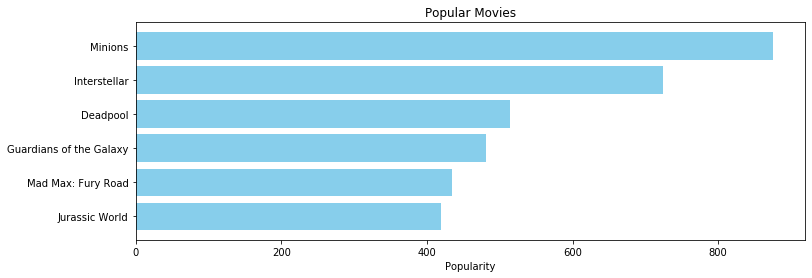

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

pop = df2.sort_values('popularity', ascending=False)  # 按照受欢迎程度
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),        # 前6个
         pop['popularity'].head(6),   # 前6个
         align='center',              # 中心对齐
         color='skyblue')             # 颜色

plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

现在，我们要记住的是，这些特征推荐者是向所有的用户提供了推荐电影的一般性图表。

他们对特定用户的兴趣爱好并不敏感。所以我们要继续使用更完善的，基于内容的过滤系统。

## 基于内容的过滤 - Content Based Filtering

在这个推荐系统中，电影的内容（概述、演员、工作人员、关键字、标语等）可以用于查找与其他电影的相似性。然后推荐最有可能的相似电影。

![recommendation_sys2](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/recommendation_sys2.png?raw=true)


### 基于描述的推荐

我们将根据所有电影的情节描述计算相似度得分，然后根据该相似度得分推荐电影。在数据集的 `overview` 中我们可以了解到此信息，现在看看数据：

In [12]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...
1    Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...
2    A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...
3    Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...
4    John Carter is a war-weary, former military captain who's inexplicably transported to the myster...
Name: overview, dtype: object

如果稍微对文字处理有一些基础的人，可以知道我们需要将每个概述转换为词向量。

现在我们使用最简单的 TF-IDF 向量为例子。

什么叫做**词语频率（Term Frequency）**？它就是文档中单词的相对频率，以 **（特定词语数量/总词语数量）** 给出。而 **逆文本频率（Inverse Document Frequency）** 是指包含该术语的文档的相对数量，以 log（总文档数量/带有该术语的文档数量）给出。

每个词语的总体重要性可以表达为 TF\*IDF。

由此我们可以得到一个矩阵，矩阵的每一列都代表总览词汇中的一个单词，而每一行代表一部电影。

SKlearn 为我们提供了一个内置的 `TfIdfVectorizer` 类，我们可以用简单的两行代码就生成一个 TFIDF 矩阵。

In [13]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. 
# Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

我们看到，数据集中使用了 20000 多个不同的单词来描述 4803 部电影。

有了这个矩阵，我们可以计算一个相似度得分。有几种计算相似度的方法，比如欧氏距离， Pearson 相关性系数以及余弦相似度得分。没有所谓“最好”的答案。不同的方法在不同情况下各有优势，通常我们会多尝试一些不同的方法。

我们将会使用余弦相似度来计算两部电影之间的相似度分数。

余弦相似度定义如下：

$$\large {\rm similarity} = \cos(\theta) = \frac{A\cdot B}{\Vert A\Vert \Vert B\Vert} = \frac{\sum_{i=1}^n A_iB_i}{\sqrt{\sum_{i=1}^n A_i^2}\sqrt{\sum_{i=1}^n B_i^2}}$$

由于我们使用了 `TfIdfVectorizer` 因此计算点积会直接为我们提供余弦相似度分数。我们可以直接使用更快的 `linear_kernel()`，而不是 `cosine_similarities()`。

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

现在我们定义一个函数，该函数以电影标题作为输入并输出 10 个最相似的电影的列表。

首先，我们需要电影标题和 DataFrame 的索引映射。换句话说，我们需要一种机制来确定电影在我们 DataFrame 中的索引。

In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

现在我们可以很好地定义推荐功能。

- 根据标题获得电影的索引；
- 获取该电影与所有电影的余弦相似度得分列表，然后转换为元组。其中第一个元素是其位置，第二个元素是相似性分数；
- 根据相似性得分对上述元组列表排序；
- 获取此列表前10个元素，忽略第一个元素，也就是它自己；
- 返回与顶部元素索引对应的标题。

In [16]:
def get_recommendations(title, cosine_sim=cosine_sim):
    """以电影标题为输入，并输出最相似电影"""
    # 获取标题对应的索引
    idx = indices[title]

    # 获取所有电影与这部电影的相似度得分
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 基于相似度排序
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 获取前十个相似的电影分数
    sim_scores = sim_scores[1:11]

    # 获取电影索引
    movie_indices = [i[0] for i in sim_scores]

    # 返回最相似的十部电影
    return df2['title'].iloc[movie_indices]

In [17]:
# 《黑暗骑士崛起》
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

尽管我们的推荐系统在查找具有类似情节描述的电影方面做的不错，但是推荐的质量却不是很好。

输入《黑暗骑士崛起》，返回了所有的蝙蝠侠电影。但是喜欢这部电影的人可能更喜欢克里斯托弗·诺兰的其他电影。这是本系统的一点缺陷。

In [18]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

接下来我们编写函数，以帮助我们从每个功能中提取所需信息。

In [19]:
def get_director(x):
    """从 crew 中获取导演名称，如果没有导演则返回 Nan"""
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
def get_list(x):
    """返回list头三个元素，如果不足3个就返回整个list"""
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only first three. 
        # If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    # Return empty list in case of missing/malformed data
    return []

In [21]:
# Define new director, cast, genres and keywords features that are in a suitable form.
# 新建导演、演员、体裁、关键字等列
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
# Print the new features of the first 3 films
# 显示头三部电影的新特征
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


接下来我们将名称和关键字实例转换为小写，并且去除空格。这样做是为了让我们的 TFIDF 向量化程序不会把 “Johnny Depp” 和 “Johnny Galecki” 视作一样。

In [23]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

现在我们准备创建 “metadata soup”，这是一个字符串，包含了我们要提供给 TFIDF 向量生成器的所有数据，包括“演员”、“导演”和“关键字”等等。

In [25]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [26]:
df2['soup'].values[0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

后续步骤与我们对基础推荐器做的一样。

其中一个主要区别是我们使用了 `CountVectorizer()` 而不是 TFIDF。这是因为如果一名演员或者导演有很多作品的话， TFIDF 可能会减轻其影响力。

In [27]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [28]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

现在我们可以重新使用 `get_recommendations()` 函数了，只需要把新的 **cosine_sim2** 当做第二个参数传入即可。

In [30]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [31]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

可以看出，由于更多的元数据，我们的推荐系统捕获了更多的信息，并且为我们提供了更好的推荐。

DC漫画 或者 漫威漫画 的粉丝可能会更喜欢同一家制作公司的电影。因此，我们还可以在上述功能中添加 `production_compant`。

通过在这锅汤中添加更多的特征，我们还可以增加**导演**的权重等。

## 协同过滤

我们刚刚搭建的基于内容的引擎有一些严重的限制。它仅仅能建议接近某个电影的电影。也就是说，它无法捕捉用户的口味，也就无法提供跨类型的推荐。

而且我们构建的推荐系统并不是真正的**个性化**的，因为它无法获知用户的个人品味和偏差。任何询问我们刚刚搭建的，以内容为基础的推荐系统的人，都只能得到与此电影相同的推荐，无论他（她）是谁。

所以呢，在这一节，我们将使用一种叫做**“协同过滤”**的技术向观众提出建议。

协同过滤基本有两种类型：

- **基于用户的过滤**

  这类推荐系统会向相似的用户推荐他们可能都喜欢的产品。为了评估两个用户之间的相似性，我们可以使用 **皮尔逊相关性系数** 或者 **余弦相似度**。

  该过滤系统可以用一个例子来说明。在下面的矩阵中，每一行代表一个用户，而各列对应不同的电影。最后一列记录了该用户与目标用户的相似性。每个单元代表用户对该电影的评价。
  
举个例子，现在我们假设用户 E 是目标用户。

> 这里似乎有点问题，待修改
  
--- | The Avengers | Sherlock | Transformers | Matrix | Titanic | Me Before You | Similarity(I, E)
:-: | :-: | :-: | :-: | :-: | :-: | :-:  | :-:
A   | 2 |   | 2 | 4 | 5  |    | NA 
B   | 5 |   | 4 |   |    | 1  |  
C   |   |   | 5 |   | 2  |    |  
D   |   | 1 |   | 5 |    | 4  |  
E   |   |   | 4 |   |    | 2  | 1 
F   | 4 | 5 |   |  1|    |    | NA

由于用户 A 和 F 与用户 E 没有共享任何电影评分，因此在皮尔逊相关性中未定义他们与用户 E  的相似性。因此，我们只需要考虑用户 B，C 和 D。基于 皮尔逊相关性 ，我们可以计算以下相似度：

--- | The Avengers | Sherlock | Transformers | Matrix | Titanic | Me Before You | Similarity(I, E)
:-: | :-: | :-: | :-: | :-: | :-: | :-:  | :-:
A   | 2 |   | 2 | 4 | 5  |    |  NA 
B   | 5 |   | 4 |   |    | 1  |  0.87
C   |   |   | 5 |   | 2  |    |  1
D   |   | 1 |   | 5 |    | 4  |  -1
E   |   |   | 4 |   |    | 2  |  1  
F   | 4 | 5 |   |  1|    |    |  NA


In [54]:
from sklearn.metrics.pairwise import cosine_similarity



USER_B_E = [[4, 1], [4, 2]]
USER_C_E = [[5], [4]]
USER_D_E = [[4], [2]]

print(cosine_similarity(USER_B_E))
print(cosine_similarity(USER_C_E))
print(cosine_similarity(USER_D_E))

[[1.         0.97618706]
 [0.97618706 1.        ]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]


In [59]:
np.corrcoef([[2, 1], [1, 2]])

array([[ 1., -1.],
       [-1.,  1.]])

In [ ]:
网址为 https://www.kaggleusercontent.com/kf/1711884/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..sY8QLyI15zfarRt6bggriw.-Bb_rTn5YywmhxNGZKncc9W4QUJPc83ODyDPtd0DRb1YBuPZr2tfjSN8CTLVRdPulfpqMGssB3gUoMTdFHB457Rnd_sALq5_ta1zL1rDYyi-Vlo0TArRHEIvv0LFRTf_hN4KbalzQDxWrkqwYhwdJAcmmqohAzxS9XNOJ7wbmaY.dX6LYi-tWfeLx8MqWDY8Mw/__results__.html 
    
    的网页可能暂时无法连接，或者它已永久性地移动到了新网址。